**Objective**

How accurately can you predict the insurance cost of individuals by analysing the factors that affect it including age, gender, number of children and smoking status.
 



There is no fixed price for insruance costs. People pay more fot better coverage. Companies consider several factors when they calculate insurance costs.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw1 = pd.read_excel('Health_insurance_cost.xlsx')

In [ ]:
raw1

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [ ]:
raw1.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
raw1.head(10)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
5,31.0,female,25.740,0.0,no,southeast,3756.62160
6,46.0,female,33.440,1.0,no,southeast,8240.58960
7,37.0,female,27.740,3.0,no,northwest,7281.50560
8,37.0,male,29.830,2.0,no,northeast,6406.41070
9,60.0,female,25.840,0.0,no,northwest,28923.13692


In [ ]:
raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   float64
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [ ]:
raw1.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

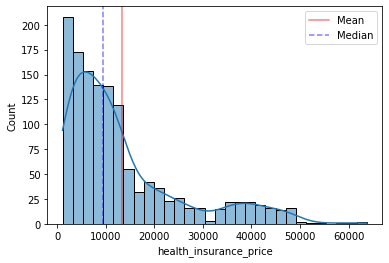

In [ ]:
sns.histplot(data = raw1['health_insurance_price'], kde = True)
plt.axvline(x=raw1.health_insurance_price.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=raw1.health_insurance_price.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

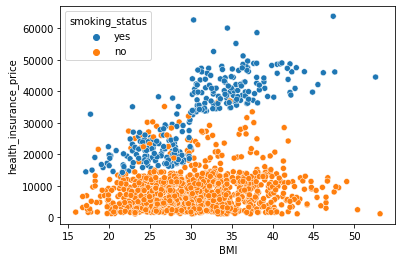

In [ ]:
sns.scatterplot(x='BMI',y='health_insurance_price',hue='smoking_status',data=raw1)

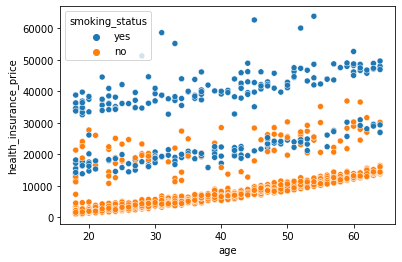

In [ ]:
sns.scatterplot(x='age',y='health_insurance_price',hue='smoking_status',data=raw1)



*   The health insurance prices are not normally distributed 
*   Along with that variable in consideration are not linearly related to health_insurance_prices eg  BMI.

*  The assumptions for Linear Regression model are failing.





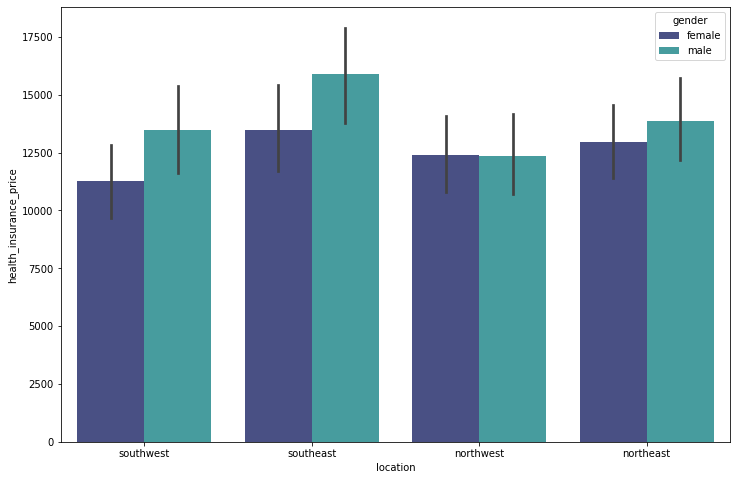

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(data = raw1, x='location', y='health_insurance_price', hue='gender', palette = 'mako')

Except **northwest** region in all other regions insurance prices are high for males than female

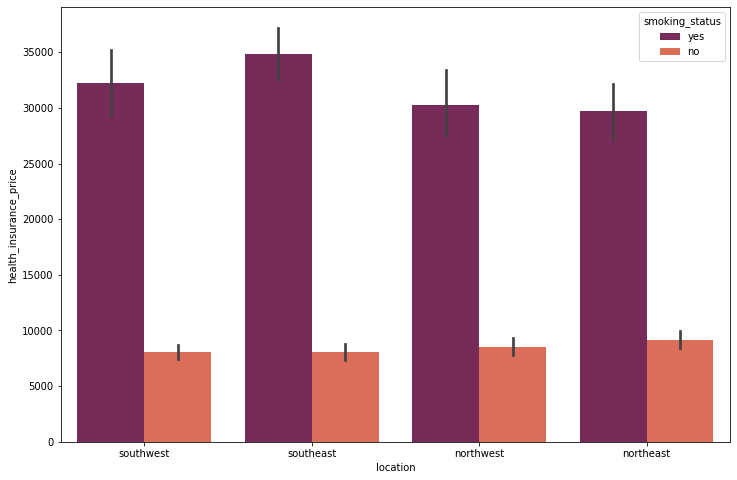

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(data = raw1, x = 'location', y = 'health_insurance_price',
                 hue='smoking_status', palette='rocket')

Insurance prices are high where people smoke.

In [ ]:
# to avoid data leakage from the output variable it is removed before imputation
raw2 = pd.DataFrame(raw1.drop(['health_insurance_price'],axis =1))

In [ ]:
raw2 =pd.get_dummies(raw2,columns=['gender','smoking_status','location'])

In [ ]:
raw2

,age,BMI,Children,gender_female,gender_male,smoking_status_no,smoking_status_yes,location_northeast,location_northwest,location_southeast,location_southwest
0,19.0,NaN,0.0,1,0,0,1,0,0,0,1
1,18.0,33.770,1.0,0,1,1,0,0,0,1,0
2,28.0,33.000,3.0,0,1,1,0,0,0,1,0
3,33.0,22.705,0.0,0,1,1,0,0,1,0,0
4,32.0,28.880,0.0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,0,1,1,0,0,1,0,0
1334,18.0,31.920,0.0,1,0,1,0,1,0,0,0
1335,18.0,36.850,0.0,1,0,1,0,0,0,1,0
1336,21.0,25.800,0.0,1,0,1,0,0,0,0,1


In [ ]:
raw2=raw2.drop(columns = ['gender_male','smoking_status_yes','location_northwest'])

In [ ]:
pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 7.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=51d9b814cad3bd58db305d2ad49e447f83a77a68c0a6f267c87690678f02519f
  Stored in directory: /root/.cache/pip/wheels/45/e1/7c/5f6e503d959df84af6d91e87ae288961a906f895d910f6533b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=7f97db2f4f6eee6a8327a8b03392e96be449cb80ca965122bab7e733cbb008ef
  Stored in directory: /root/.cache/pip/wheels/5f/e9/7a/9969b4e11eb626b45f12a46849b8c65aa718244a243583caf1
Successfully built fancyimpute knnimpute


In [ ]:
# KNN imputation for the missing values
from fancyimpute import KNN
knn_imputer = KNN()
raw2_knn = raw2.copy(deep=True)
raw2_knn.iloc[:, :] = knn_imputer.fit_transform(raw2_knn)

Imputing row 1/1338 with 1 missing, elapsed time: 0.296
Imputing row 101/1338 with 0 missing, elapsed time: 0.299
Imputing row 201/1338 with 0 missing, elapsed time: 0.300
Imputing row 301/1338 with 0 missing, elapsed time: 0.301
Imputing row 401/1338 with 0 missing, elapsed time: 0.302
Imputing row 501/1338 with 0 missing, elapsed time: 0.304
Imputing row 601/1338 with 0 missing, elapsed time: 0.305
Imputing row 701/1338 with 0 missing, elapsed time: 0.306
Imputing row 801/1338 with 0 missing, elapsed time: 0.307
Imputing row 901/1338 with 0 missing, elapsed time: 0.309
Imputing row 1001/1338 with 0 missing, elapsed time: 0.310
Imputing row 1101/1338 with 0 missing, elapsed time: 0.311
Imputing row 1201/1338 with 0 missing, elapsed time: 0.312
Imputing row 1301/1338 with 0 missing, elapsed time: 0.313


In [ ]:
raw2_knn

,age,BMI,Children,gender_female,smoking_status_no,location_northeast,location_southeast,location_southwest
0,19.0,26.200004,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770000,1.0,0.0,1.0,0.0,1.0,0.0
2,28.0,33.000000,3.0,0.0,1.0,0.0,1.0,0.0
3,33.0,22.705000,0.0,0.0,1.0,0.0,0.0,0.0
4,32.0,28.880000,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,50.0,30.970000,3.0,0.0,1.0,0.0,0.0,0.0
1334,18.0,31.920000,0.0,1.0,1.0,1.0,0.0,0.0
1335,18.0,36.850000,0.0,1.0,1.0,0.0,1.0,0.0
1336,21.0,25.800000,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
insurance_cost=pd.DataFrame(raw2_knn)

In [ ]:
insurance_cost

,age,BMI,Children,gender_female,smoking_status_no,location_northeast,location_southeast,location_southwest
0,19.0,26.200004,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770000,1.0,0.0,1.0,0.0,1.0,0.0
2,28.0,33.000000,3.0,0.0,1.0,0.0,1.0,0.0
3,33.0,22.705000,0.0,0.0,1.0,0.0,0.0,0.0
4,32.0,28.880000,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,50.0,30.970000,3.0,0.0,1.0,0.0,0.0,0.0
1334,18.0,31.920000,0.0,1.0,1.0,1.0,0.0,0.0
1335,18.0,36.850000,0.0,1.0,1.0,0.0,1.0,0.0
1336,21.0,25.800000,0.0,1.0,1.0,0.0,0.0,1.0


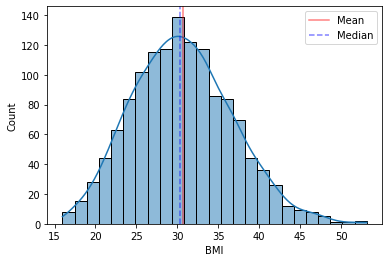

In [ ]:
sns.histplot(data = insurance_cost['BMI'], kde = True)
plt.axvline(x=insurance_cost.BMI.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=insurance_cost.BMI.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

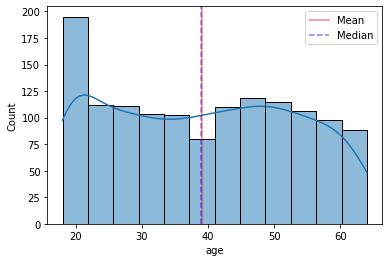

In [ ]:
sns.histplot(data = insurance_cost['age'], kde = True)
plt.axvline(x=insurance_cost.age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=insurance_cost.age.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

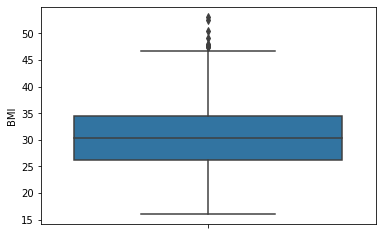

In [ ]:
sns.boxplot(y=insurance_cost['BMI'])

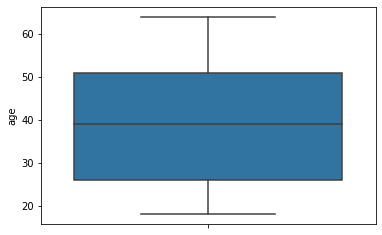

In [ ]:
sns.boxplot(y=insurance_cost['age'])

In [ ]:
raw3 = pd.DataFrame(raw1['health_insurance_price'])

In [ ]:
raw3['health_insurance_price']=raw3['health_insurance_price'].replace(np.NaN,0) #replaced NaN with 0

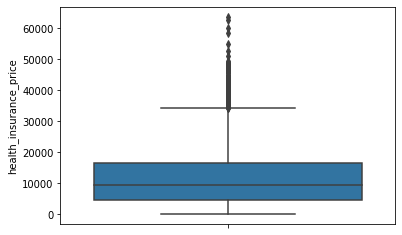

In [ ]:
sns.boxplot(y=raw3['health_insurance_price'])

In [ ]:
x = insurance_cost.drop(['gender_female','location_northeast','location_southeast','location_southwest'],axis=1)
y = raw3.health_insurance_price

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 113, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x , y)  

RandomForestRegressor(n_estimators=113, random_state=0)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.718991260049741
Adjusted R^2: 0.7178649725148702
MAE: 4324.450213810404
MSE: 40194822.34269233
RMSE: 6339.938670262697


In [ ]:
df

,Actual,Predicted
578,9724.53000,10497.877512
610,8547.69130,8953.253640
569,45702.02235,45445.025600
1034,12950.07120,12978.029305
198,9644.25250,9525.969677
...,...,...
574,13224.05705,13149.912751
1174,4433.91590,4907.159292
1327,9377.90470,10084.469767
817,3597.59600,3820.783541


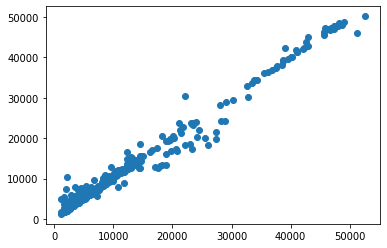

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(x_test)

In [ ]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8937365970166053
Adjusted R^2: 0.8924485557683218
MAE: 2465.7279748895057
MSE: 16729527.076167764
RMSE: 4090.1744554685883


#SVM Regression

In [ ]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
sc_y = StandardScaler() 
x = sc_x.fit_transform(x) 
y = sc_y.fit_transform(y.values.reshape(-1,1))

In [ ]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [ ]:
# Train the model using the training sets 
reg.fit(x_train, y_train)

SVR()

In [ ]:
# Model prediction on train data
y_pred = reg.predict(x_train)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
# Model Evaluation

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: -0.09671907378813471
Adjusted R^2: -0.10111474141854804
MAE: 8233.837203306932
MSE: 156872089.95193216
RMSE: 12524.858879521644


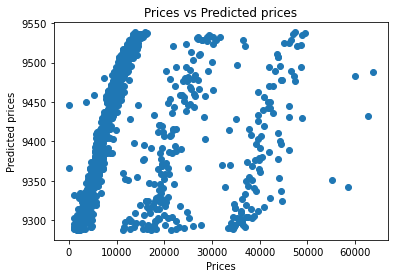

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8937365970166053
Adjusted R^2: 0.8924485557683218
MAE: 2465.7279748895057
MSE: 16729527.076167764
RMSE: 4090.1744554685883


#XGBooster

In [ ]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(x_train, y_train)

[14:16:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Model prediction on train data
y_pred = reg.predict(x_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8801355657058292
Adjusted R^2: 0.8796551471315038
MAE: 2307.9685295966788
MSE: 17145123.822534237
RMSE: 4140.667074582819


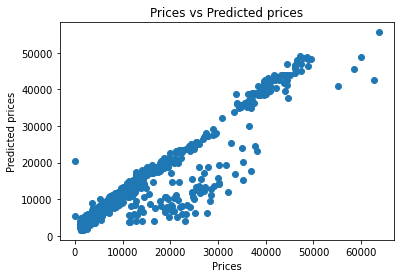

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

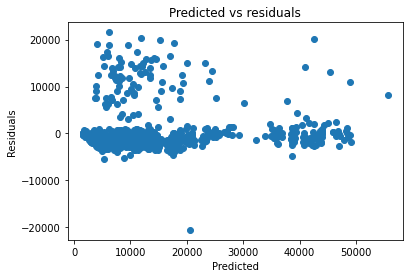

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#Predicting Test data with the model
y_test_pred = reg.predict(x_test)

In [ ]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8937365970166053
Adjusted R^2: 0.8924485557683218
MAE: 2465.7279748895057
MSE: 16729527.076167764
RMSE: 4090.1744554685883


#Linear Regression

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Value of y intercept
lm.intercept_

12313.058178028563

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([x_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,age,245.876118
1,BMI,311.445262
2,Children,411.909318
3,smoking_status_no,-23483.63435


In [ ]:
# Model prediction on train data
y_pred = lm.predict(x_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.718991260049741
Adjusted R^2: 0.7178649725148702
MAE: 4324.450213810404
MSE: 40194822.34269233
RMSE: 6339.938670262697


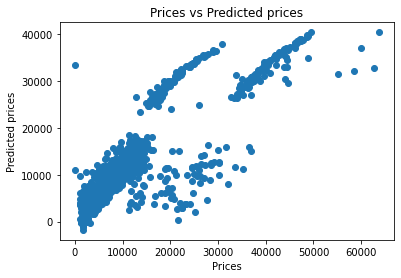

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


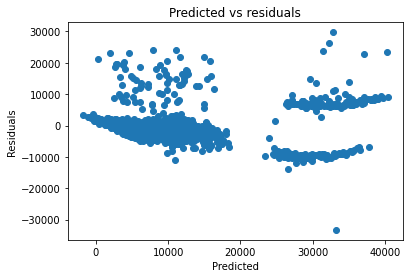

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


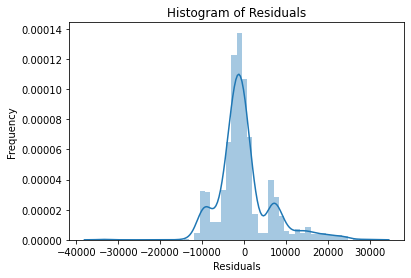

In [ ]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = lm.predict(x_test)

In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7899840651087014
Adjusted R^2: 0.7874384174130493
MAE: 4055.547475147144
MSE: 33063756.38788549
RMSE: 5750.109250082601


In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,89.373660
2,XGBoost,89.373660
3,Support Vector Machines,89.373660
0,Linear Regression,78.998407


Random Forest,XGBoost and SVM work equally good for this Dataset.